<font face="Calibri" size="2"> <i>Open SAR Toolkit - Tutorial 4a, version 1.1, Nobember 2019. Andreas Vollrath, ESA/ESRIN phi-lab</i>
</font>

![title](auxiliary/header_image.PNG)

--------

# OST Tutorial IV - A
## How to do a batch processing of Sentinel-1 GRD data subset

--------

**Short description**

This notebook is very similar to the Tutorial IVa, with the difference that you will process GRD data over a larger area and create time-series and timescan mosaics. It therefore represents the workflow for large-scale processing.

--------

**Requirements**

- a PC/Mac with at least 16GB of RAM
- about 150GB of free disk space
- a Copernicus Open Data Hub user account, valid for at least 7 days (https://scihub.copernicus.eu)
--------

**NOTE:** all cells that have an * after its number can be executed without changing any code. 

### 1* - Import of Libraries

In this step we import some standard python libraries for OS independent path handling as well as the *Sentinel1_GRDBatch* class thta handles the full workflow from search, download and processing of multiple GRD scenes. In addition, the OST helper module *vector* is loaded to create an AOI based on Point coordinates, and the *raster* module for creating a time-series animation.

In [1]:
import os
from os.path import join
from pathlib import Path
from pprint import pprint

from ost import Sentinel1Batch as Sen1Batch
from ost.helpers import vector, raster

# Setup logging so we can see what could go wrong
import logging
from ost.log import set_log_level
set_log_level(logging.DEBUG)

### 2* - Set up the project 

Here you going to initialize the *Sentinel1_GRDBatch* class by determining the project folder, the AOI and the start and end date. Since you should be already familiar with the *search* and *refine* functions, we execute them within the same cell.

In [2]:
# define a project directory
home = str(Path.home())
# create a processing directory
project_dir = join(home, 'Tutorial_4b')

# define aoi with helper function, i.e. get a buffered area around point coordinates
# Vienna lat lon
lat = 48.20849
lon= 16.37208

# define aoi with a shapefile
aoi = vector.latlon_to_wkt(lat, lon, buffer_meter=200000, envelope=True)

#define the start and end date
start = '2020-02-01'
end = '2020-02-15'

# initialize the class to s1_grd instance
s1_grd = Sen1Batch(
    project_dir=project_dir,
    aoi=aoi,
    start=start,
    end=end,
    product_type='GRD',
    metadata_concurency=10
)

# trigger the search
s1_grd.search()

# optional: once you did the search the first time, you can load 
# the full inventory uncommenting the follwoing 2 lines
# and commenting the search command
#s1_grd.inventory_file = join(s1_grd.inventory_dir, 'full.inventory.shp')
#s1_grd.read_inventory()

# do the refinement
s1_grd.refine()

2020-02-20 10:07:30,182 WARNING root Project directory already exists.No data has been deleted at this point butmake sure you really want to use this folder.
2020-02-20 10:07:30,191 DEBUG ost.helpers.scihub If you do not have a Copernicus Scihub user account go to: https://scihub.copernicus.eu and register


 Your Copernicus Scihub Username: suprd
 Your Copernicus Scihub Password: ·········


2020-02-20 10:07:45,763 DEBUG ost.s1_core.search INFO: writing inventory data to shape file: /home/jovyan/Tutorial_4b/inventory/full_inventory.shp
2020-02-20 10:07:45,859 WARNING fiona._env Normalized/laundered field name: 'polarisationmode' to 'polarisati'
2020-02-20 10:07:45,860 WARNING fiona._env Normalized/laundered field name: 'orbitdirection' to 'orbitdirec'
2020-02-20 10:07:45,861 WARNING fiona._env Normalized/laundered field name: 'acquisitiondate' to 'acquisitio'
2020-02-20 10:07:45,861 WARNING fiona._env Normalized/laundered field name: 'relativeorbitnumber' to 'relativeor'
2020-02-20 10:07:45,861 WARNING fiona._env Normalized/laundered field name: 'orbitnumber' to 'orbitnumbe'
2020-02-20 10:07:45,862 WARNING fiona._env Normalized/laundered field name: 'producttype' to 'producttyp'
2020-02-20 10:07:45,862 WARNING fiona._env Normalized/laundered field name: 'slicenumber' to 'slicenumbe'
2020-02-20 10:07:45,862 WARNING fiona._env Normalized/laundered field name: 'beginposition'

### 3* - Plot refined data inventory

Here you will visualize the resultant dataframes from the refined search inventory based on the product key.

Populating the interactive namespace from numpy and matplotlib


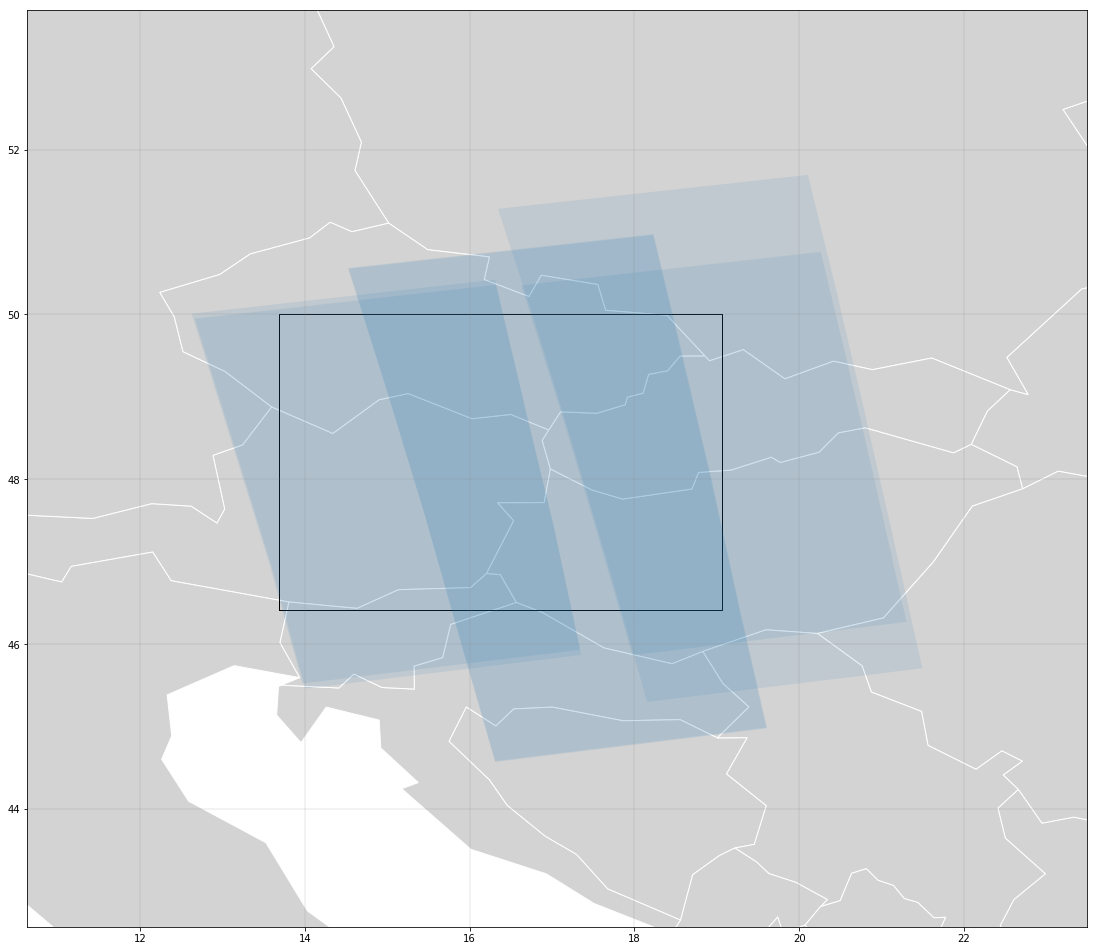

In [4]:
#---------------------------------------------------
# for plotting purposes we use this iPython magic
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (19, 19)
#---------------------------------------------------

# search command
key = 'ASCENDING_VVVH'
# we plot the full Inventory on a map
s1_grd.plot_inventory(s1_grd.refined_inventory_dict[key], transperancy=.1)

# Update inventory as to download only relevant products
s1_grd.inventory = s1_grd.refined_inventory_dict[key]

### 4* - Download of GRD scenes

As already shown in Tutorial II, you will download the scenes based on the refined inventory dataframe for the respective produckt key.

In [ ]:
s1_grd.download(mirror=2)

2020-02-20 10:08:18,783 DEBUG ost.project INFO: One or more of your scenes need to be downloaded.
2020-02-20 10:08:18,784 DEBUG ost.s1_core.s1_dl Please provide username for the selected server


Username: suprd


2020-02-20 10:08:20,565 DEBUG ost.s1_core.s1_dl Please provide password for the selected server


Password: ·········


2020-02-20 10:08:40,313 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/06/S1B_IW_GRDH_1SDV_20200206T163421_20200206T163446_020151_026250_176E.zip
2020-02-20 10:08:40,315 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/06/S1B_IW_GRDH_1SDV_20200206T163331_20200206T163356_020151_026250_CBB6.zip
2020-02-20 10:08:40,316 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/06/S1B_IW_GRDH_1SDV_20200206T163356_20200206T163421_020151_026250_7B43.zip
2020-02-20 10:08:40,317 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/05/S1A_IW_GRDH_1SDV_20200205T164205_20200205T164230_031120_03939E_A49B.zip
2020-02-20 10:08:40,324 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/05/S1A_IW_GRDH_1SDV_20200205T164230_20200205T164255_031120_03939E_56AE.zip
2020-

2020-02-20 10:09:52,411 DEBUG ost.helpers.asf INFO: Checking the zip archive of /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/06/S1B_IW_GRDH_1SDV_20200206T163331_20200206T163356_020151_026250_CBB6.zip for inconsistency
2020-02-20 10:09:52,594 DEBUG ost.helpers.asf INFO: Checking the zip archive of /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/04/S1B_IW_GRDH_1SDV_20200204T165017_20200204T165042_020122_026163_7006.zip for inconsistency


2020-02-20 10:10:04,291 DEBUG ost.helpers.asf INFO: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/06/S1B_IW_GRDH_1SDV_20200206T163331_20200206T163356_020151_026250_CBB6.zip passed the zip test.
2020-02-20 10:10:04,313 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/12/S1A_IW_GRDH_1SDV_20200212T163402_20200212T163427_031222_039723_7495.zip
2020-02-20 10:10:04,791 DEBUG ost.helpers.asf INFO: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/04/S1B_IW_GRDH_1SDV_20200204T165017_20200204T165042_020122_026163_7006.zip passed the zip test.
2020-02-20 10:10:04,804 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/12/S1A_IW_GRDH_1SDV_20200212T163517_20200212T163542_031222_039723_4AD6.zip


2020-02-20 10:10:33,979 DEBUG ost.helpers.asf INFO: Checking the zip archive of /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/05/S1A_IW_GRDH_1SDV_20200205T164205_20200205T164230_031120_03939E_A49B.zip for inconsistency


2020-02-20 10:10:46,812 DEBUG ost.helpers.asf INFO: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/05/S1A_IW_GRDH_1SDV_20200205T164205_20200205T164230_031120_03939E_A49B.zip passed the zip test.
2020-02-20 10:10:46,824 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/12/S1A_IW_GRDH_1SDV_20200212T163452_20200212T163517_031222_039723_0948.zip


2020-02-20 10:11:40,091 DEBUG ost.helpers.asf INFO: Checking the zip archive of /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/06/S1B_IW_GRDH_1SDV_20200206T163356_20200206T163421_020151_026250_7B43.zip for inconsistency
2020-02-20 10:11:51,188 DEBUG ost.helpers.asf INFO: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/06/S1B_IW_GRDH_1SDV_20200206T163356_20200206T163421_020151_026250_7B43.zip passed the zip test.
2020-02-20 10:11:52,022 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/11/S1B_IW_GRDH_1SDV_20200211T164212_20200211T164237_020224_0264BB_5F96.zip


2020-02-20 10:12:27,785 DEBUG ost.helpers.asf INFO: Checking the zip archive of /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/06/S1B_IW_GRDH_1SDV_20200206T163421_20200206T163446_020151_026250_176E.zip for inconsistency


2020-02-20 10:12:33,219 DEBUG ost.helpers.asf INFO: Checking the zip archive of /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/05/S1A_IW_GRDH_1SDV_20200205T164255_20200205T164320_031120_03939E_3414.zip for inconsistency


2020-02-20 10:12:45,828 DEBUG ost.helpers.asf INFO: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/05/S1A_IW_GRDH_1SDV_20200205T164255_20200205T164320_031120_03939E_3414.zip passed the zip test.
2020-02-20 10:12:47,085 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/11/S1B_IW_GRDH_1SDV_20200211T164122_20200211T164147_020224_0264BB_BD24.zip


2020-02-20 10:12:48,092 DEBUG ost.helpers.asf INFO: Checking the zip archive of /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/12/S1A_IW_GRDH_1SDV_20200212T163452_20200212T163517_031222_039723_0948.zip for inconsistency
2020-02-20 10:12:50,217 DEBUG ost.helpers.asf INFO: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/06/S1B_IW_GRDH_1SDV_20200206T163421_20200206T163446_020151_026250_176E.zip passed the zip test.
2020-02-20 10:12:50,370 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/10/S1A_IW_GRDH_1SDV_20200210T165033_20200210T165058_031193_039633_9755.zip


2020-02-20 10:13:05,740 DEBUG ost.helpers.asf INFO: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/12/S1A_IW_GRDH_1SDV_20200212T163452_20200212T163517_031222_039723_0948.zip passed the zip test.
2020-02-20 10:13:05,752 DEBUG ost.helpers.asf INFO: Downloading scene to: /home/jovyan/Tutorial_4b/download/SAR/GRD/2020/02/10/S1A_IW_GRDH_1SDV_20200210T165123_20200210T165148_031193_039633_4764.zip


### 5* - Set ARD parameters

Similar to the *Sentinel1-Scene* class (Tutorial I and III), the *Sentinel1-GRDBatch* class handles the defintion of ARD types in a hierarchical dictionary structure. You can use the same types and steps to customize as for the *Sentinel1-Scene* class.

In [8]:
# single scene ARD parameters
s1_grd.ard_parameters['resolution'] = 50
s1_grd.ard_parameters['product_type'] = 'GTCgamma0'
s1_grd.ard_parameters['create_ls_mask'] = False

# time-series ARD
s1_grd.ard_parameters['remove_mt_speckle'] = False

# in case we want to use an external dem
#s1_grd.set_external_dem('path/to/externaldem')

pprint(s1_grd.ard_parameters)

{'apply_ls_mask': False,
 'border_noise': True,
 'create_ls_mask': False,
 'dem': 'SRTM 1Sec HGT',
 'dtype_output': 'float32',
 'ls_mask_create': False,
 'metrics': ['avg', 'max', 'min', 'std', 'cov', 'count'],
 'mt_speckle_filter': True,
 'polarisation': 'VV,VH,HH,HV',
 'product_type': 'GTCgamma0',
 'remove_mt_speckle': False,
 'remove_outliers': True,
 'resampling': 'CUBIC_CONVOLUTION',
 'resolution': 50,
 'speckle_filter': False,
 'to_db': False,
 'to_db_mt': True,
 'type': 'OST'}


### 6* - Run the batch routine

To process all the data, including time-series and timescans is as easy as one command. All the complexity is handled behind, and you just have to wait, since processing can take quite a while.

**Note** that as a last argument we submit the AOI (given as WKT) for subsetting.

In [10]:
s1_grd.to_ard(
    overwrite=False
)
s1_grd.create_timeseries()
s1_grd.create_timesscan()

2020-02-19 18:25:37,053 DEBUG ost.project INFO: Starting OST ARD processing for SLC


AttributeError: 'Sentinel1Batch' object has no attribute 'burst_inventory'

### 7* - Create a time-series animation

For interactive presentations it is nice to have animated "movies". The following command allows you to create animated time-series of oyur processed data.

In [ ]:
# create the animation
s1_grd.create_timeseries_animations(
    shrink_factor=10,
    duration=1,
    add_dates=False,
)